In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset 1

In [19]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.values

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [3]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [4]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.values, axis=0)
Day = np.concatenate(Day.values, axis=0)
bkp_start_time = np.concatenate(bkp_start_time.values, axis=0)
workflow_ID = np.concatenate(workflow_ID.values, axis=0)
File_name = np.concatenate(File_name.values, axis=0)
bkp_size = np.concatenate(bkp_size.values, axis=0)
bkp_time = np.concatenate(bkp_time.values, axis=0)


In [5]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [6]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

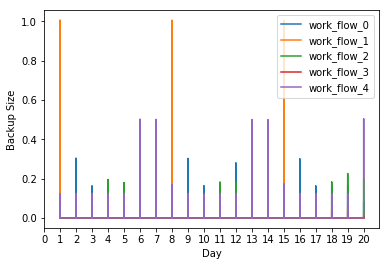

In [7]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])
plt.plot(day_idx[:twenty_days+1], w_0)
plt.plot(day_idx[:twenty_days+1],w_1)
plt.plot(day_idx[:twenty_days+1],w_2)
plt.plot(day_idx[:twenty_days+1],w_3)
plt.plot(day_idx[:twenty_days+1],w_4)
plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

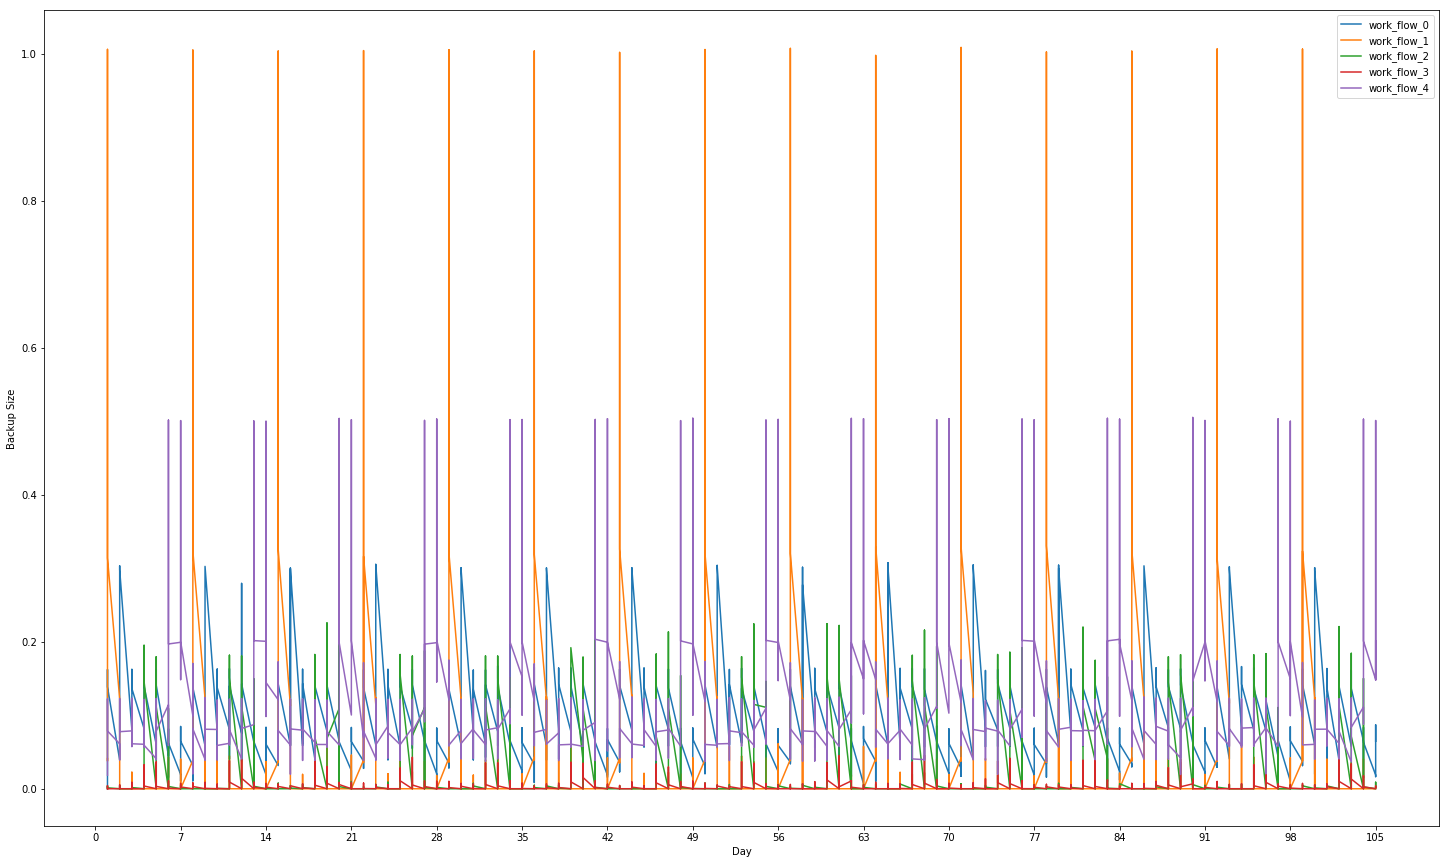

In [8]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.empty(total_idx)
w_1 = np.empty(total_idx)
w_2 = np.empty(total_idx)
w_3 = np.empty(total_idx)
w_4 = np.empty(total_idx)
w_0[:] = np.nan
w_1[:] = np.nan
w_2[:] = np.nan
w_3[:] = np.nan
w_4[:] = np.nan
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.figure(figsize=(25,15))
plt.plot(day_idx[np.isfinite(w_0)], w_0[np.isfinite(w_0)])
plt.plot(day_idx[np.isfinite(w_1)], w_1[np.isfinite(w_1)])
plt.plot(day_idx[np.isfinite(w_2)], w_2[np.isfinite(w_2)])
plt.plot(day_idx[np.isfinite(w_3)], w_3[np.isfinite(w_3)])
plt.plot(day_idx[np.isfinite(w_4)], w_4[np.isfinite(w_4)])
plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

## Scalar Encoding

In [92]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [11]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [12]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10278069260122778
RMSE Testing for fold 0 = 0.11063384639051045
RMSE Training for fold 1 = 0.10264563883580366
RMSE Testing for fold 1 = 0.1117572590218389
RMSE Training for fold 2 = 0.10446675282348132
RMSE Testing for fold 2 = 0.09538141990233402
RMSE Training for fold 3 = 0.10419012520176112
RMSE Testing for fold 3 = 0.09803970056136233
RMSE Training for fold 4 = 0.10368853019184365
RMSE Testing for fold 4 = 0.10271242355313108
RMSE Training for fold 5 = 0.10358810244788684
RMSE Testing for fold 5 = 0.10362249581257525
RMSE Training for fold 6 = 0.1049819334433337
RMSE Testing for fold 6 = 0.09012281662454316
RMSE Training for fold 7 = 0.10358451461381582
RMSE Testing for fold 7 = 0.10365548851695157
RMSE Training for fold 8 = 0.10458473578252436
RMSE Testing for fold 8 = 0.09420123633077254
RMSE Training for fold 9 = 0.10130763063602413
RMSE Testing for fold 9 = 0.12228274027241041


In [13]:
print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))

Average RMSE Training = 0.10358186565777024
Average RMSE Testing = 0.10324094269864299


#### Scatter Plots

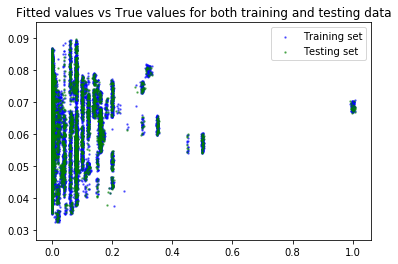

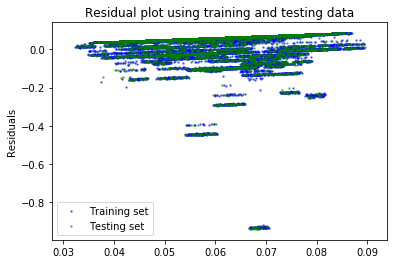

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## Random Forest

## Neural Network

In [150]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [151]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


In [152]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)
# print(enc.categories_)
# print(np.shape(enc.get_feature_names()))
# print(enc.get_feature_names())

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [132]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_relu = []
avg_test_rmses_relu = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_relu.append(np.mean(train_rmses))
    avg_test_rmses_relu.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08828075136570991
Average testing RMSE for hidden layer size 2 =  0.10689170590309924
 
Average training RMSE for hidden layer size 5 =  0.10290831652789663
Average testing RMSE for hidden layer size 5 =  0.1032727939822399
 
Average training RMSE for hidden layer size 10 =  0.02886032561674855
Average testing RMSE for hidden layer size 10 =  0.03935513712062509
 
Average training RMSE for hidden layer size 50 =  0.018077162570088397
Average testing RMSE for hidden layer size 50 =  0.05626987561372756
 
Average training RMSE for hidden layer size 100 =  0.017098587765273975
Average testing RMSE for hidden layer size 100 =  0.046802375495210144
 
Average training RMSE for hidden layer size 150 =  0.014962282027769733
Average testing RMSE for hidden layer size 150 =  0.030426449713720254
 
Average training RMSE for hidden layer size 200 =  0.01469230806138131
Average testing RMSE for hidden layer size 200 =  0.026233398975783518
 
Averag

In [136]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_logistic = []
avg_test_rmses_logistic = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='logistic', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_logistic.append(np.mean(train_rmses))
    avg_test_rmses_logistic.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08808108192058792
Average testing RMSE for hidden layer size 2 =  0.08898025441846827
 
Average training RMSE for hidden layer size 5 =  0.09354320464616969
Average testing RMSE for hidden layer size 5 =  0.09472625667393217
 
Average training RMSE for hidden layer size 10 =  0.08822168354719666
Average testing RMSE for hidden layer size 10 =  0.08992037605437428
 
Average training RMSE for hidden layer size 50 =  0.08875912765878816
Average testing RMSE for hidden layer size 50 =  0.09146318545192278
 
Average training RMSE for hidden layer size 100 =  0.08904707935673276
Average testing RMSE for hidden layer size 100 =  0.092093620430008
 
Average training RMSE for hidden layer size 150 =  0.08902637733345754
Average testing RMSE for hidden layer size 150 =  0.0906831563528114
 
Average training RMSE for hidden layer size 200 =  0.08973175371057117
Average testing RMSE for hidden layer size 200 =  0.09440559827728431
 
Average traini

In [134]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_tanh = []
avg_test_rmses_tanh = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='tanh', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_tanh.append(np.mean(train_rmses))
    avg_test_rmses_tanh.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08806051786066574
Average testing RMSE for hidden layer size 2 =  0.1045847037140895
 
Average training RMSE for hidden layer size 5 =  0.0879298714748257
Average testing RMSE for hidden layer size 5 =  0.08996297029032765
 
Average training RMSE for hidden layer size 10 =  0.06343199425209858
Average testing RMSE for hidden layer size 10 =  0.13265719114759794
 
Average training RMSE for hidden layer size 50 =  0.04121000719102465
Average testing RMSE for hidden layer size 50 =  0.06369807817626424
 
Average training RMSE for hidden layer size 100 =  0.03925399427801385
Average testing RMSE for hidden layer size 100 =  0.08738910271003547
 
Average training RMSE for hidden layer size 150 =  0.03134970364100455
Average testing RMSE for hidden layer size 150 =  0.04658124012874803
 
Average training RMSE for hidden layer size 200 =  0.0255650175130193
Average testing RMSE for hidden layer size 200 =  0.050438242504910656
 
Average train

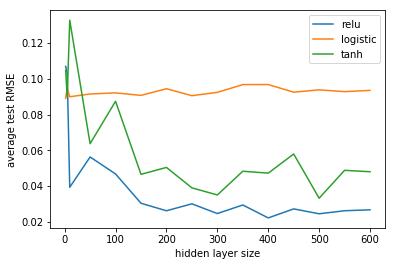

In [138]:
plt.figure()
plt.plot(layer_sizes, avg_test_rmses_relu)
plt.plot(layer_sizes, avg_test_rmses_logistic)
plt.plot(layer_sizes, avg_test_rmses_tanh)
plt.legend(['relu', 'logistic', 'tanh'])
plt.xlabel('hidden layer size')
plt.ylabel('average test RMSE')
plt.show()

In [142]:
print('Best combination: {} hidden layers with ReLU gives RMSE {}'.format(layer_sizes[np.argmin(avg_test_rmses_relu)], 
                                                                          np.min(avg_test_rmses_relu)))

Best combination: 400 hidden layers with ReLU gives RMSE 0.022235233473332016


In [153]:
from sklearn.model_selection import train_test_split

In [154]:
best_layer_size = 400
best_activation = 'relu'

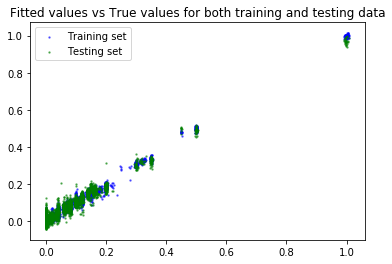

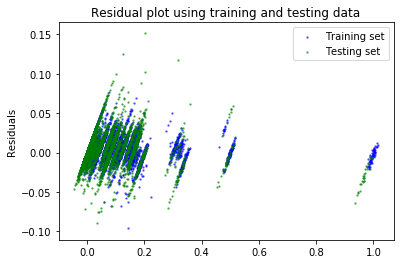

In [168]:
X_train, X_test, y_train, y_test = train_test_split(enc.transform(train_data), target_data, random_state=0)

nn = MLPRegressor(hidden_layer_sizes=(best_layer_size,), activation=best_activation, random_state=0)
nn.fit(X_train, y_train)

# Fitted values vs true values
plt.scatter(y_train, nn.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, nn.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(nn.predict(X_train), nn.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(nn.predict(X_test), nn.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = nn.predict(X_encoded)

# model_scatter_plots(nn, X_train, y_train, X_test, y_test)

## Predicting backup sizes for each workflow

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [170]:
def model_scatter_plots(model, X_train, y_train, X_test, y_test):

    # Fitted values vs true values
    plt.figure()
    plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Fitted values vs True values for both training and testing data')
    # plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()

    plt.figure()
    # Residuals vs Fitted values
    plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
    plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Residual plot using training and testing data')
    plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()
    # predicted_Y = nn.predict(X_encoded)

#### Linear Regression

In [129]:
data_wf0_enc = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_enc = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_enc = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_enc = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_enc = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_enc = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_enc = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_enc = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_enc = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_enc = Y_encoded[np.where(X_encoded[:,1]==4)]

In [132]:
model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf0_enc):
    X_train, X_test = data_wf0_enc[trainset], data_wf0_enc[testset]
    y_train, y_test = target_wf0_enc[trainset], target_wf0_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.03583523363399887
Average test RMSE: 0.03586346655296642


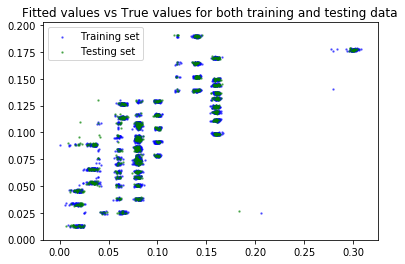

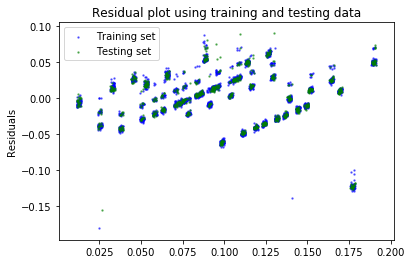

In [171]:
X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc, target_wf0_enc, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [136]:
model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf1_enc):
    X_train, X_test = data_wf1_enc[trainset], data_wf1_enc[testset]
    y_train, y_test = target_wf1_enc[trainset], target_wf1_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.14874414236869585
Average test RMSE: 0.14709758822040112


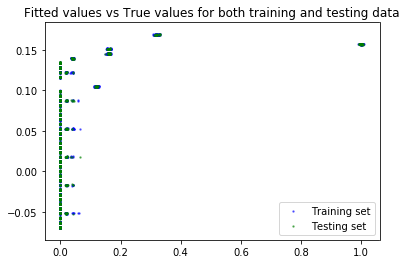

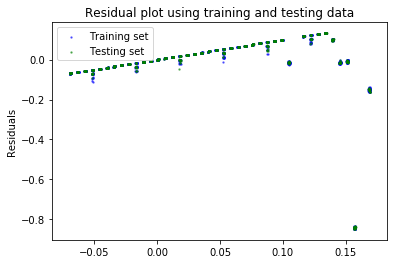

In [173]:
X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc, target_wf1_enc, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [137]:
model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf2_enc):
    X_train, X_test = data_wf2_enc[trainset], data_wf2_enc[testset]
    y_train, y_test = target_wf2_enc[trainset], target_wf2_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.04290319403417192
Average test RMSE: 0.042575330845049685


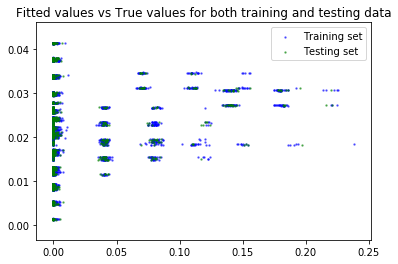

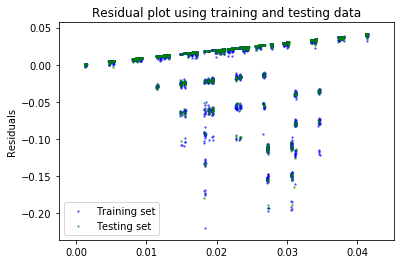

In [174]:
X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc, target_wf2_enc, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [138]:
model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf3_enc):
    X_train, X_test = data_wf3_enc[trainset], data_wf3_enc[testset]
    y_train, y_test = target_wf3_enc[trainset], target_wf3_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.007242981713369212
Average test RMSE: 0.007186683488524774


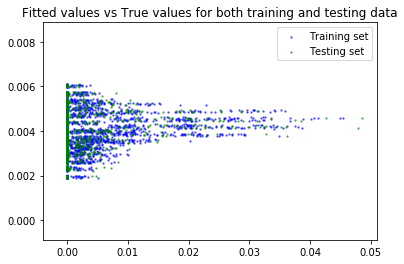

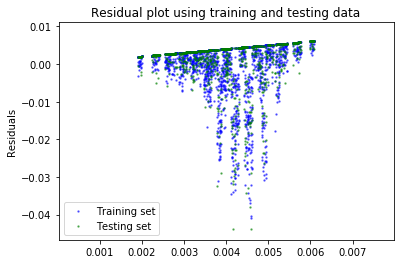

In [175]:
X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc, target_wf3_enc, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [139]:
model = LinearRegression()
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(data_wf4_enc):
    X_train, X_test = data_wf4_enc[trainset], data_wf4_enc[testset]
    y_train, y_test = target_wf4_enc[trainset], target_wf4_enc[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
#     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
#     print(' ')
    i = i + 1
print('Average train RMSE:', np.mean(rmse_per_fold_train))
print('Average test RMSE:', np.mean(rmse_per_fold_test))

Average train RMSE: 0.08591402576289184
Average test RMSE: 0.08533975477118065


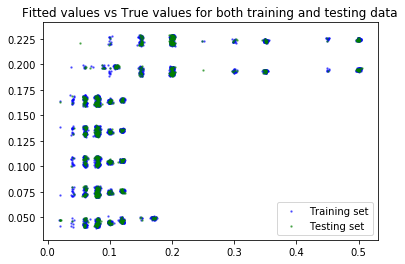

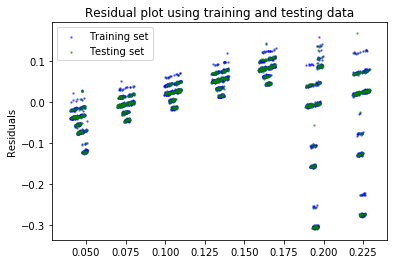

In [176]:
X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc, target_wf4_enc, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

#### Polynomial fit

In [178]:
from sklearn.preprocessing import PolynomialFeatures

In [179]:
degrees = np.arange(2, 11)

In [180]:
# Workflow 0

avg_train_rmse_wf0 = []
avg_test_rmse_wf0 = []
for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf0_enc_poly = pf.fit_transform(data_wf0_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf0_enc_poly):
        X_train, X_test = data_wf0_enc_poly[trainset], data_wf0_enc_poly[testset]
        y_train, y_test = target_wf0_enc[trainset], target_wf0_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
    avg_train_rmse_wf0.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf0.append(np.mean(rmse_per_fold_test))
    
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.029518466854866227
Average test RMSE: 0.029502897626732527
 
Polynomial degree = 3
Average train RMSE: 0.026309415804718038
Average test RMSE: 0.026305526903382226
 
Polynomial degree = 4
Average train RMSE: 0.024961475559754358
Average test RMSE: 0.025086888132718633
 
Polynomial degree = 5
Average train RMSE: 0.018208727639027388
Average test RMSE: 0.018684693093351596
 
Polynomial degree = 6
Average train RMSE: 0.010375477092569496
Average test RMSE: 0.012377932455605907
 
Polynomial degree = 7
Average train RMSE: 0.009063629085155182
Average test RMSE: 0.01151565643402853
 
Polynomial degree = 8
Average train RMSE: 0.007930881932416154
Average test RMSE: 0.014248602125379307
 
Polynomial degree = 9
Average train RMSE: 0.007560680278589582
Average test RMSE: 0.018007107517771882
 
Polynomial degree = 10
Average train RMSE: 0.0073054751038941655
Average test RMSE: 0.02910844228343674
 


In [181]:
# Workflow 1

avg_train_rmse_wf1 = []
avg_test_rmse_wf1 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf1_enc_poly = pf.fit_transform(data_wf1_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf1_enc_poly):
        X_train, X_test = data_wf1_enc_poly[trainset], data_wf1_enc_poly[testset]
        y_train, y_test = target_wf1_enc[trainset], target_wf1_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
    avg_train_rmse_wf1.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf1.append(np.mean(rmse_per_fold_test))
    
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.1298259301013154
Average test RMSE: 0.12858749245927964
 
Polynomial degree = 3
Average train RMSE: 0.11446268650736749
Average test RMSE: 0.11417526518250418
 
Polynomial degree = 4
Average train RMSE: 0.08938110020437243
Average test RMSE: 0.0886920309657169
 
Polynomial degree = 5
Average train RMSE: 0.06672060886732237
Average test RMSE: 0.06897861264630475
 
Polynomial degree = 6
Average train RMSE: 0.04251427996364838
Average test RMSE: 0.04287124781563496
 
Polynomial degree = 7
Average train RMSE: 0.020779407222074962
Average test RMSE: 0.02241908644826267
 
Polynomial degree = 8
Average train RMSE: 0.00813914213985223
Average test RMSE: 0.012694555703324405
 
Polynomial degree = 9
Average train RMSE: 0.005429901704900408
Average test RMSE: 0.011294306150723903
 
Polynomial degree = 10
Average train RMSE: 0.0053473187958245644
Average test RMSE: 0.02520426396597103
 


In [182]:
# Workflow 2

avg_train_rmse_wf2 = []
avg_test_rmse_wf2 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf2_enc_poly = pf.fit_transform(data_wf2_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf2_enc_poly):
        X_train, X_test = data_wf2_enc_poly[trainset], data_wf2_enc_poly[testset]
        y_train, y_test = target_wf2_enc[trainset], target_wf2_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

    avg_train_rmse_wf2.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf2.append(np.mean(rmse_per_fold_test))    
        
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.038456617650456486
Average test RMSE: 0.03861503639058135
 
Polynomial degree = 3
Average train RMSE: 0.034747540044764005
Average test RMSE: 0.03500688841678451
 
Polynomial degree = 4
Average train RMSE: 0.03187596455234814
Average test RMSE: 0.03279809008700659
 
Polynomial degree = 5
Average train RMSE: 0.026371837784730106
Average test RMSE: 0.02838923380921849
 
Polynomial degree = 6
Average train RMSE: 0.02194035224074257
Average test RMSE: 0.025991650803648937
 
Polynomial degree = 7
Average train RMSE: 0.021061017990273018
Average test RMSE: 0.028720057244180038
 
Polynomial degree = 8
Average train RMSE: 0.019313376423274974
Average test RMSE: 0.03303180042840781
 
Polynomial degree = 9
Average train RMSE: 0.01778652174284938
Average test RMSE: 0.04359309608931091
 
Polynomial degree = 10
Average train RMSE: 0.017191040885571593
Average test RMSE: 0.07656627206340241
 


In [183]:
# Workflow 3

avg_train_rmse_wf3 = []
avg_test_rmse_wf3 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf3_enc_poly = pf.fit_transform(data_wf3_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf1_enc_poly):
        X_train, X_test = data_wf3_enc_poly[trainset], data_wf3_enc_poly[testset]
        y_train, y_test = target_wf3_enc[trainset], target_wf3_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
    avg_train_rmse_wf3.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf3.append(np.mean(rmse_per_fold_test))
    
    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.006297819898730468
Average test RMSE: 0.006280036673436598
 
Polynomial degree = 3
Average train RMSE: 0.005940338335117744
Average test RMSE: 0.0059766480906618645
 
Polynomial degree = 4
Average train RMSE: 0.0055918149011232
Average test RMSE: 0.007168665295853442
 
Polynomial degree = 5
Average train RMSE: 0.004834561722674309
Average test RMSE: 0.004982388831328381
 
Polynomial degree = 6
Average train RMSE: 0.00455838879451713
Average test RMSE: 0.005334007550664039
 
Polynomial degree = 7
Average train RMSE: 0.004443141312240654
Average test RMSE: 0.008365558571555404
 
Polynomial degree = 8
Average train RMSE: 0.004252740380562465
Average test RMSE: 0.010805060641653746
 
Polynomial degree = 9
Average train RMSE: 0.004285139693708153
Average test RMSE: 0.017397876104552682
 
Polynomial degree = 10
Average train RMSE: 0.003981884745125171
Average test RMSE: 0.04173386431830166
 


In [184]:
# Workflow 4

avg_train_rmse_wf4 = []
avg_test_rmse_wf4 = []

for d in degrees:
    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    pf = PolynomialFeatures(d)
    data_wf4_enc_poly = pf.fit_transform(data_wf4_enc)
    
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(data_wf4_enc_poly):
        X_train, X_test = data_wf4_enc_poly[trainset], data_wf4_enc_poly[testset]
        y_train, y_test = target_wf4_enc[trainset], target_wf4_enc[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
        
    avg_train_rmse_wf4.append(np.mean(rmse_per_fold_train))
    avg_test_rmse_wf4.append(np.mean(rmse_per_fold_test))        

    print('Polynomial degree = {}'.format(d))
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))
    print(' ')

Polynomial degree = 2
Average train RMSE: 0.06918598945317216
Average test RMSE: 0.06881612660989997
 
Polynomial degree = 3
Average train RMSE: 0.06344962766618488
Average test RMSE: 0.06522524866652124
 
Polynomial degree = 4
Average train RMSE: 0.058496773245711634
Average test RMSE: 0.06753661433420918
 
Polynomial degree = 5
Average train RMSE: 0.04342253659971486
Average test RMSE: 0.04881045331364785
 
Polynomial degree = 6
Average train RMSE: 0.03477731306376805
Average test RMSE: 0.06792001557942692
 
Polynomial degree = 7
Average train RMSE: 0.030768619889823056
Average test RMSE: 0.061729735434137956
 
Polynomial degree = 8
Average train RMSE: 0.023584110475334173
Average test RMSE: 0.05554143657144641
 
Polynomial degree = 9
Average train RMSE: 0.022153733957048262
Average test RMSE: 0.07734438337166367
 
Polynomial degree = 10
Average train RMSE: 0.016279264116340862
Average test RMSE: 0.2576397482337965
 


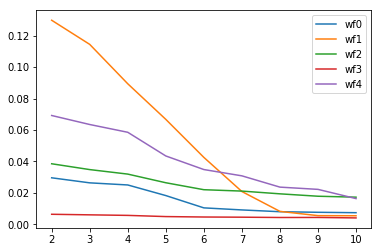

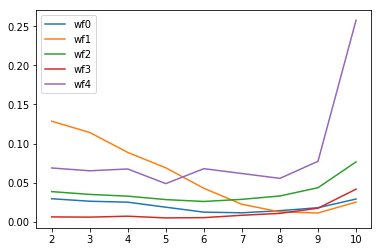

In [188]:
plt.figure()
plt.plot(degrees, avg_train_rmse_wf0)
plt.plot(degrees, avg_train_rmse_wf1)
plt.plot(degrees, avg_train_rmse_wf2)
plt.plot(degrees, avg_train_rmse_wf3)
plt.plot(degrees, avg_train_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0)
plt.plot(degrees, avg_test_rmse_wf1)
plt.plot(degrees, avg_test_rmse_wf2)
plt.plot(degrees, avg_test_rmse_wf3)
plt.plot(degrees, avg_test_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()